# Sarcasm Headlines Classification Project

# import Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load Data

In [2]:
path="E:/Study DATA/Deep learning Projects/Sarcasm Headlines Classification Project/Dataset/Sarcasm_Headlines_Dataset_v2.json"
data=[json.loads(line) for line in open(path,"r")]

In [3]:
print(data[0])
print("Total Number of Records: ",len(data))

{'is_sarcastic': 1, 'headline': 'thirtysomething scientists unveil doomsday clock of hair loss', 'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'}
Total Number of Records:  28619


# Preprocessing Data

In [4]:
headlines=[]
labels=[]
for record in data:
    headlines.append(record["headline"])
    labels.append(record['is_sarcastic'])
    
print("Total Number of Headline: ",len(headlines))
print("Total Number of Labels: ",len(labels))

Total Number of Headline:  28619
Total Number of Labels:  28619


In [5]:
headlines[0]

'thirtysomething scientists unveil doomsday clock of hair loss'

# Creating Words Dictionaly

In [6]:
training_size=22000
num_words=12000
padding="post"
maxlen=40

In [7]:
train_data=headlines[:training_size]
train_labels=labels[:training_size]
test_data=headlines[training_size:]
test_labels=labels[training_size:]

In [8]:
tokenizer=Tokenizer(num_words=num_words, oov_token='<oov>')

tokenizer.fit_on_texts(train_data)

word_index=tokenizer.word_index
print(word_index)

{'<oov>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'man': 13, 'trump': 14, 'at': 15, 'from': 16, 'about': 17, 'by': 18, 'you': 19, 'after': 20, 'this': 21, 'be': 22, 'out': 23, 'up': 24, 'that': 25, 'as': 26, 'it': 27, 'how': 28, 'not': 29, 'he': 30, 'what': 31, 'are': 32, 'his': 33, 'who': 34, 'your': 35, 'just': 36, 'has': 37, 'all': 38, 'report': 39, 'will': 40, 'more': 41, 'into': 42, 'one': 43, 'have': 44, 'year': 45, 'why': 46, 'over': 47, 'u': 48, 'area': 49, 's': 50, 'woman': 51, 'says': 52, 'day': 53, 'can': 54, 'first': 55, 'like': 56, 'donald': 57, 'time': 58, 'no': 59, 'get': 60, 'old': 61, 'her': 62, 'off': 63, 'life': 64, 'people': 65, 'now': 66, "'": 67, "trump's": 68, 'house': 69, 'obama': 70, 'an': 71, 'white': 72, 'make': 73, 'was': 74, 'still': 75, 'back': 76, 'if': 77, 'down': 78, 'than': 79, 'women': 80, 'i': 81, 'my': 82, 'world': 83, '5': 84, 'they': 85, 'could': 86, 'way': 87, 'when': 88, 'clin

In [9]:
train_data=tokenizer.texts_to_sequences(train_data)
test_data=tokenizer.texts_to_sequences(test_data)
print(len(train_data[0]))
print(len(test_data[0]))

8
11


In [10]:
train_data=pad_sequences(train_data, padding=padding, truncating="post", maxlen=maxlen)
test_data=pad_sequences(test_data, padding=padding, truncating="post", maxlen=maxlen)

In [11]:
print(len(train_data[0]))
print(len(test_data[0]))
print("Train labels Type: ",type(train_labels))
print("Test labels Type: ",type(test_labels))

40
40
Train labels Type:  <class 'list'>
Test labels Type:  <class 'list'>


In [12]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [13]:
print("Train labels Type: ",type(train_labels))
print("Test labels Type: ",type(test_labels))

Train labels Type:  <class 'numpy.ndarray'>
Test labels Type:  <class 'numpy.ndarray'>


# Build and Compile the Model

In [14]:
model=models.Sequential()

model.add(layers.Embedding(num_words, 128, input_length=maxlen))
model.add(layers.Bidirectional(layers.SimpleRNN(16)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           1536000   
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4640      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,540,673
Trainable params: 1,540,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/10
688/688 - 77s - loss: 0.4489 - acc: 0.7840 - val_loss: 0.3197 - val_acc: 0.8606 - 77s/epoch - 112ms/step
Epoch 2/10
688/688 - 56s - loss: 0.1894 - acc: 0.9311 - val_loss: 0.3449 - val_acc: 0.8606 - 56s/epoch - 82ms/step
Epoch 3/10
688/688 - 45s - loss: 0.0803 - acc: 0.9750 - val_loss: 0.4217 - val_acc: 0.8548 - 45s/epoch - 65ms/step
Epoch 4/10
688/688 - 35s - loss: 0.0358 - acc: 0.9901 - val_loss: 0.5214 - val_acc: 0.8429 - 35s/epoch - 51ms/step
Epoch 5/10
688/688 - 38s - loss: 0.0203 - acc: 0.9952 - val_loss: 0.5805 - val_acc: 0.8533 - 38s/epoch - 55ms/step
Epoch 6/10
688/688 - 37s - loss: 0.0141 - acc: 0.9957 - val_loss: 0.7004 - val_acc: 0.8439 - 37s/epoch - 54ms/step
Epoch 7/10
688/688 - 36s - loss: 0.0145 - acc: 0.9956 - val_loss: 0.7964 - val_acc: 0.8211 - 36s/epoch - 52ms/step
Epoch 8/10
688/688 - 33s - loss: 0.0115 - acc: 0.9964 - val_loss: 0.7617 - val_acc: 0.8399 - 33s/epoch - 48ms/step
Epoch 9/10
688/688 - 34s - loss: 0.0096 - acc: 0.9972 - val_loss: 0.8122 - val_

In [17]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

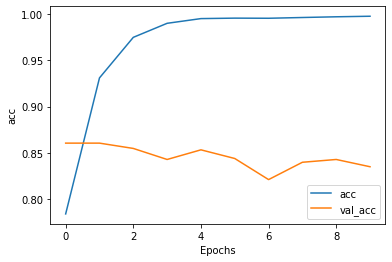

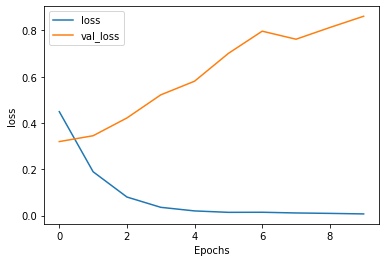

In [18]:
plot_graph(history,'acc')
plot_graph(history,'loss')